## Problem Statement

### The goal is to build 2 classification Machine learning models that accurately predicts whether an individual is likely to have heart disease based on diagnostic measurements.

### Dataset Description
#### Dataset: Cardiovascular_Disease Database
#### Size: 1000 samples, 12 features, 1 target

### Features:
#### 1.  patientid             - Patient Identification Number (numeric number)
#### 2.  age                   - Age (Numeric	In Years)
#### 3.  gender                - Gender (0 (female) / 1 (male))
#### 4.  chestpain             - Chest Pain Type (0 (typical angina), 1 (atypical angina), 2 (non-anginal pain), 3 (asymptomatic))
#### 5.  restingBP             - Resting blood pressure (94-200 (in mm HG))
#### 6.  serumcholestrol       - Serum cholesterol (126-564 (in mg/dl))
#### 7.  fastingbloodsugar     - Fasting blood sugar (0 (false) / 1 (true) > 120 mg/dl)
#### 8.  restingrelectro       - Resting electrocardiogram results (0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy)
#### 9.  maxheartrate          - Maximum heart rate achieved (71-202)
#### 10. exerciseangia         - Exercise induced angina ((0 (no) / 1 (yes)))
#### 11. oldpeak               - Oldpeak = ST (0-6.2)
#### 12. slope                 - Slope of the peak exercise ST segment (1 (upsloping), 2 (flat), 3 (downsloping))
#### 13. noofmajorvessels      - Number of major vessels (0, 1, 2, 3)
#### 14. target                - Classification (0 (Absence of Heart Disease), 1 (Presence of Heart Disease))


### Outcome:
#### 0 = Absence of Heart Disease
#### 1 = Presence of Heart Disease

### Type of Problem
#### This is a Supervised Learning problem — specifically a Binary Classification task — where we want to predict if someone has Heart Disease. we will be using the below algorithms to build and test the prediction model.

### Type of Problem
#### This is a Supervised Learning problem — specifically a Binary Classification task — where we want to predict if someone has diabetes. we will be using the below algorithms to build and test the prediction model.
#### 1) Logistic Regression,
#### 2) Random Forest

### Evaluation Metrics
#### Since it's a medical problem (false negatives can be dangerous), use:
#### • Accuracy
#### • Precision, Recall, F1-score

In [1]:
#from Kaggle
#https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data/Cardiovascular_Disease_Dataset.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the diabetes dataset
file_path = "Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

# explore Basic Statistics & Structure of dataset

# View dimension of data source no of row and column
print('Shape:',df.shape)

#View Type
print('Types:',df.dtypes)

# View summary of dataset
print('Info:',df.info)

# Summary of numerical features
print(df.describe())



Shape: (1000, 14)
Types: patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object
Info: <bound method DataFrame.info of      patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1

In [ ]:
# To check the unique data for feature
print('gender: ', df['gender'].unique(), "\n")
print('chestpain: ', df['chestpain'].unique(), "\n")
print('restingrelectro: ', df['restingrelectro'].unique(), "\n")
print('fastingbloodsugar : ', df['fastingbloodsugar'].unique(), "\n")
print('exerciseangia: ', df['exerciseangia'].unique(), "\n")
print('slope: ', df['slope'].unique(), "\n")
print('noofmajorvessels: ', df['noofmajorvessels'].unique(), "\n")
print('target: ', df['target'].unique(), "\n")


In [2]:
# Conduct data cleaning

# Check for missing value and replace zeros with NaN for better analysis

# Count zeros in columns that should not have zero values
cols_with_zeros = ["patientid", "age", "restingBP", "serumcholestrol", "maxheartrate", "slope"]
for col in cols_with_zeros:
    num_zeros = (df[col] == 0).sum()
    print(f"{col}: {num_zeros} zeros")

# Replace zeros with NaN for better analysis
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())
print(df.head())


patientid: 0 zeros
age: 0 zeros
restingBP: 0 zeros
serumcholestrol: 53 zeros
maxheartrate: 0 zeros
slope: 180 zeros

Missing values per column:
patientid              0
age                    0
gender                 0
chestpain              0
restingBP              0
serumcholestrol       53
fastingbloodsugar      0
restingrelectro        0
maxheartrate           0
exerciseangia          0
oldpeak                0
slope                180
noofmajorvessels       0
target                 0
dtype: int64
   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171              NaN   
1     119250   40       1          0         94            229.0   
2     119372   49       1          2        133            142.0   
3     132514   43       1          0        138            295.0   
4     146211   31       1          1        199              NaN   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0    

target
1    58.0
0    42.0
Name: proportion, dtype: float64

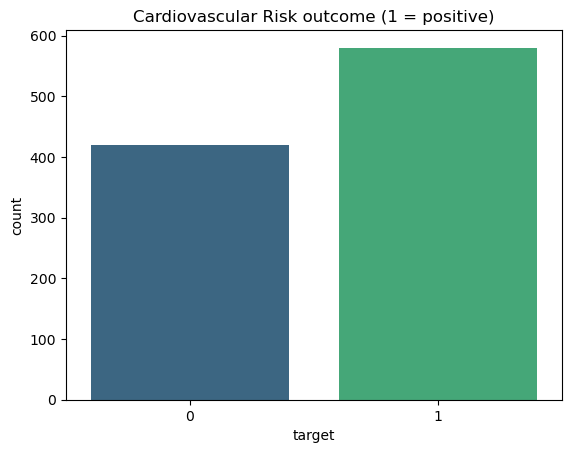

In [3]:
# Classes Distribution Ratio
sns.countplot(x='target', data=df, hue='target', palette='viridis', legend=False)
plt.title('Cardiovascular Risk outcome (1 = positive)')
df['target'].value_counts(normalize=True)*100

#To find the %

### Observation :  
#### From above histogram, the classes are slidely imbalance
** **

In [4]:
# Check duplicates
print('Duplicate:',df.duplicated().sum())
df_no_dupes = df.drop_duplicates()


Duplicate: 0


### Thee above showed that there is no duplicate records in the dataset

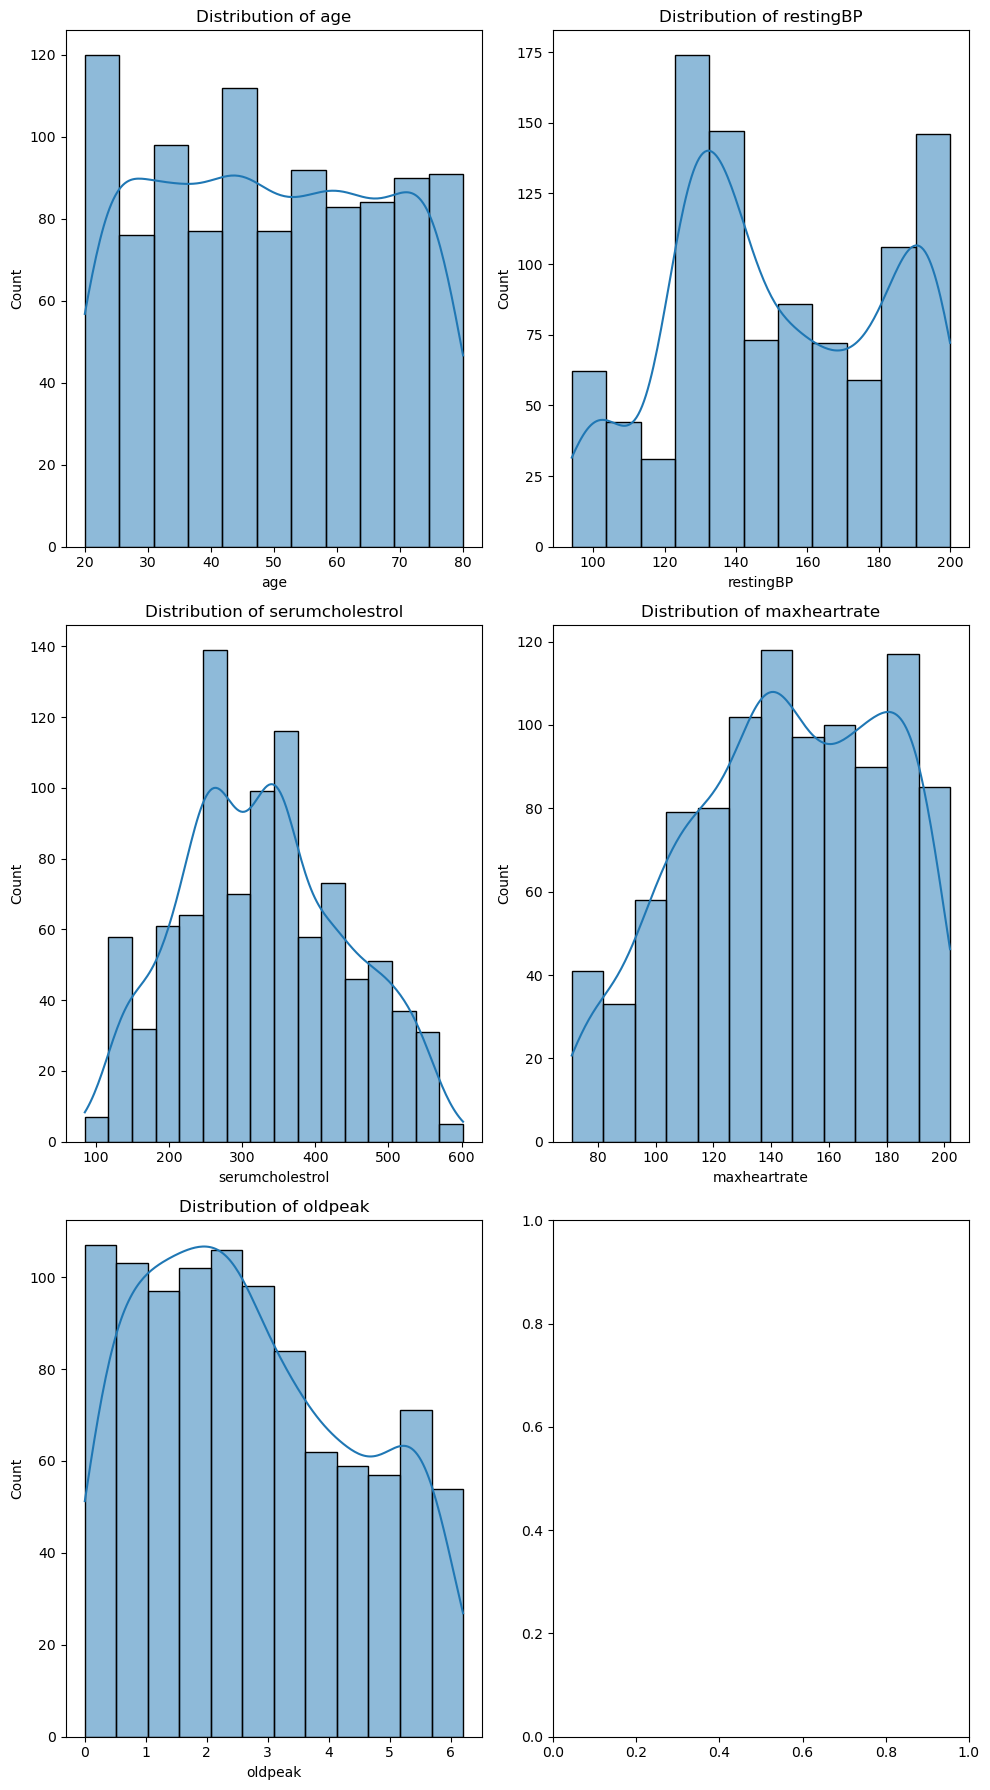

In [5]:
# Visualize distributions of key numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 18))
axes = axes.flatten()
numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



### Observations 
#### - The distribution of age is fairly uniform, with a slight peak around 20 and 45 years old and a decline towards the older age groups. 
#### - restingBP (resting blood pressure) shows a concentrated distribution between 120-180, which is typical.
#### - serumcholestro show a normal distribution with some missing values to be imputed.
#### - The maxheartrate (maximum heart rate) distribution shows a normal distribution-like bell shape.
#### - oldpeak shows a right-skewed distribution, with many values at the lower end.



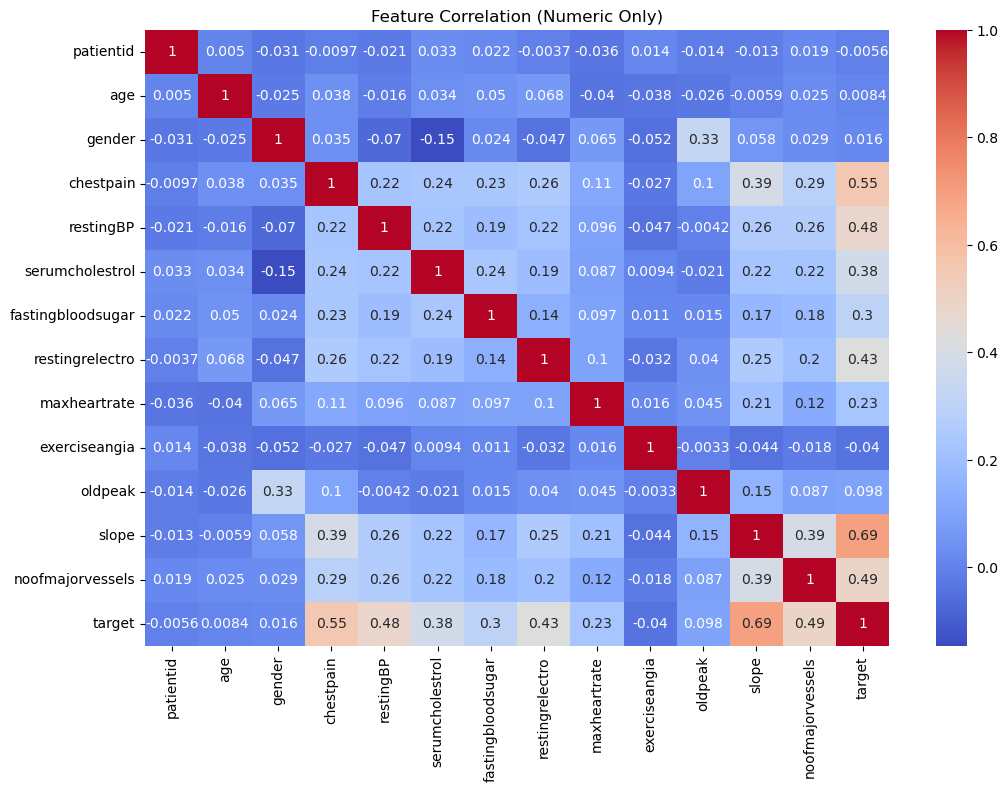

In [6]:
# Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Only)")
plt.show()

### Observations 
### The correlation matrix revealed the relationships between variables.
#### - feature Slope has the strongest positive correlation with Target 0.69 (highest)
#### - chestpain shows a moderate correlation with target, suggesting that the type of chest pain is a significant indicator of heart disease.
#### - restingBP, and noofmajorvessels also show moderate correlation with target


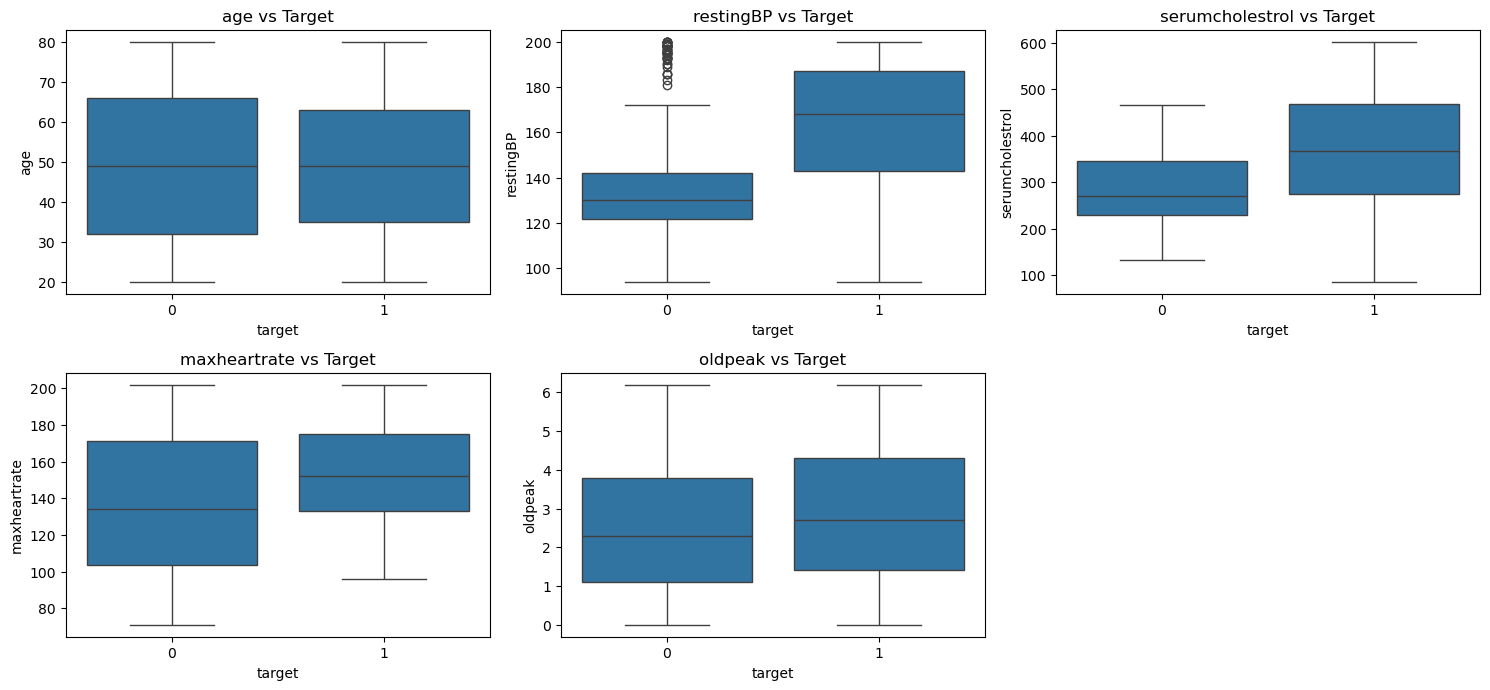

In [7]:
#Boxplot of features by outcome
features = ["age", "restingBP", "serumcholestrol",  "maxheartrate", "oldpeak"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
#    print(feature)
    plt.subplot(3, 3, i+1) # Changed grid to 3x3 to accommodate 8 plots
    sns.boxplot(x="target", y=feature, data=df)
    plt.title(f"{feature} vs Target")
plt.tight_layout()
plt.show()

### Key take-aways
#### restingBP, serumcholestrol and Maxheartrate have significantly higher medians in the positive class, therefore is more predictive
#### age and oldpeak has closer medians, therefore may be less predictive.
#### 

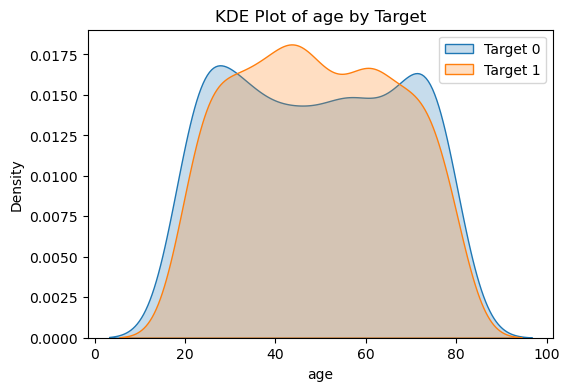

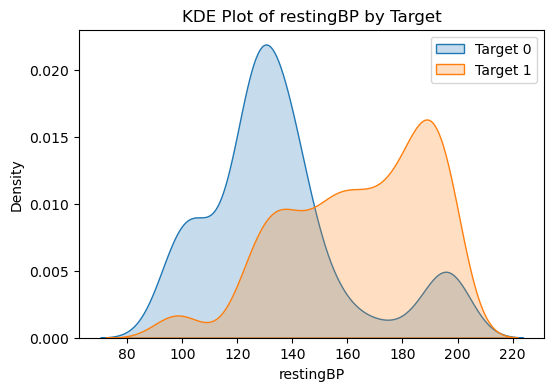

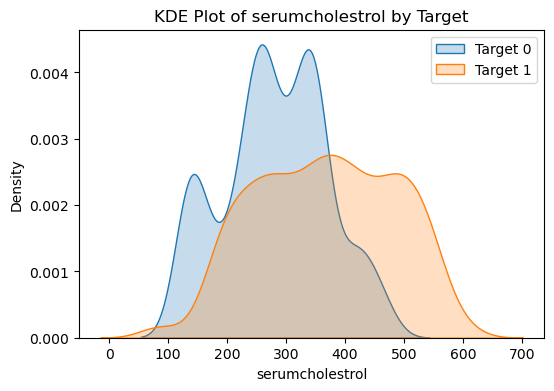

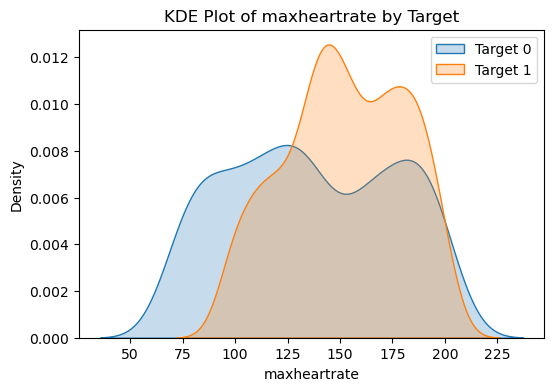

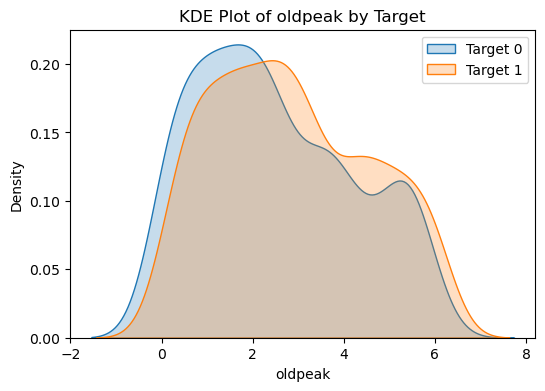

In [8]:
#KDE Plot of feature by outcome
for feature in features:
    plt.figure(figsize=(6, 4))
    for label in [0, 1]:
        subset = df[df["target"] == label]
        sns.kdeplot(subset[feature], label=f"Target {label}", fill=True)
    plt.title(f"KDE Plot of {feature} by Target")
    plt.legend()
    plt.show()

### Observations 
#### Distinctive Separation for restingBP, type of chestpain and no of major vessels with target indicating useful for classification

In [ ]:
# detect outliers
outlier_counts = {}
for col in df.columns[:-1]:          # skip target
    q1, q3 = df[col].quantile([0.25,0.75])
    iqr = q3-q1
    outliers = ((df[col] < q1-1.5*iqr) | (df[col] > q3+1.5*iqr)).sum()
    outlier_counts[col] = outliers
pd.Series(outlier_counts).sort_values(ascending=False)

### Quick Summary of EDA
#### - RestingBP, Serumcholertrol, maxheartrate - More predictive; higher for cardiovascular risk individuals
#### - Serumcholertrol - lower for cardiovascular risk individuals
#### - maxheartrate - higher for cardiovascular risk individuals
#### - type of chestpain and noofmajorbessels - higher cardiovascular risk for certain tpe of chestpin and certain no of major vessels
#### - Age - Not a good predictor
#### - Missing Data - Present in serumcholestrol, slope.

### Correlation heat-map showed the correlation of each feature with Outcome
#### 4 features had the highest positive values (slope ≈ 0.8, chestpain ≈ 0.55, restingBP ≈ 0.48, Serumcholestrol ≈ 0.38, maxheartrate =0.23).

### Box / violin plots (Target vs each feature)
#### These plots revealed clear separations in medians for restingBP, serumchloestrol and maxheartrate between cardio risk (1) and non-cardio risk (0) groups, whereas other features had heavily overlapping distributions.

#### The outliers in the dataset do not overturn the “strong vs weak predictor” ranking that we already obtained from correlations and boxplots.

## Data Preprocessing
### Data cleaning
#### Preprocessing

#### Impute missing values
#### Split into train/test sets
#### Scale the features
#### Ensure readiness for modeling

In [9]:
# Preprocessing

# Impute missing values

# Fill missing values with median which is more robust to outlier than mean
df.fillna(df.mean(), inplace=True)

# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ---  feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((800, 13), (200, 13))

### Hyperparameter tuning

### Voting & Stacking ensembles

### Model performance comparison

In [10]:
# Train Logistic Regression with hyperparameter tuning

#Define parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

# logreg_param_grid = {
#     'C': [0.01, 0.1, 1, 100],
#     'solver': ['liblinear', 'lbfgs'],
#     'class_weight': ['balanced']
# }

# Create and tune model
logreg = LogisticRegression(max_iter=1000)
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
logreg_grid.fit(X_train_scaled, y_train)

# Best model
best_logreg = logreg_grid.best_estimator_
print("\nBest Logistic Regression Params:", logreg_grid.best_params_)


# Evaluate best model
y_pred = best_logreg.predict(X_test_scaled)
print("Best Hyperparameters:", logreg_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Random Forest with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [100, 200, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}


# Train with Grid Search
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_rf.best_estimator_
print("\nBest Random Forest Params:", grid_rf.best_params_)

# Evaluate best model
y_pred_rf = best_rf.predict(X_test_scaled)

print("\nBest Random Forest Parameters:", grid_rf.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Logistic Regression Params: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.955
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        83
           1       0.97      0.95      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 200}

Best Random Forest Parameters: {'class_weight': 'balanced', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.975
Classification Report:
              pr

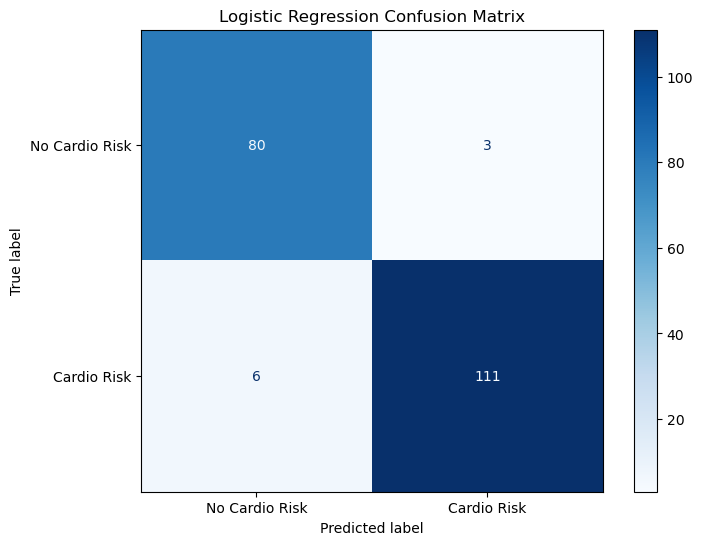

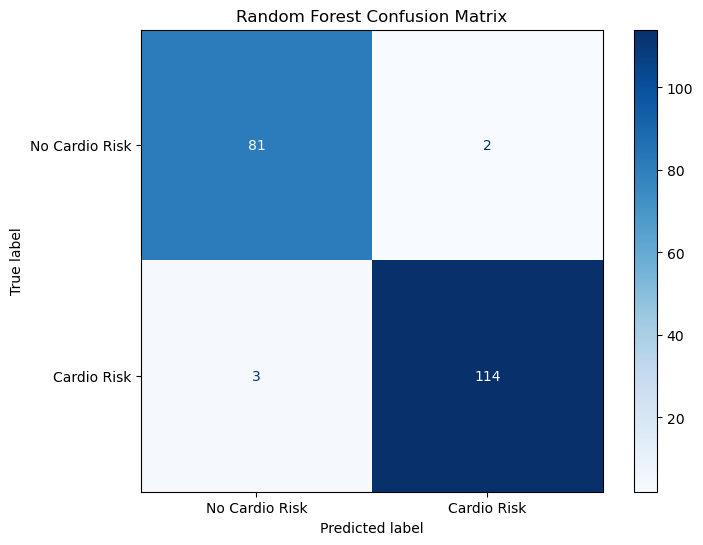

In [12]:
# --- Plot Confusion Matrix Heatmaps ---

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred, labels=logreg_grid.best_estimator_.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_log_reg, ax_log_reg = plt.subplots(figsize=(8, 6))
disp_log_reg.plot(cmap='Blues', ax=ax_log_reg, values_format='d')
ax_log_reg.set_title('Logistic Regression Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=grid_rf.best_estimator_.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_rf, ax_rf = plt.subplots(figsize=(8, 6))
disp_rf.plot(cmap='Blues', ax=ax_rf, values_format='d')
ax_rf.set_title('Random Forest Confusion Matrix')
plt.show()

### Insight
### Random Forest is better at identifying cardio risk with

### Higher True Positive (114 vs 111)
### This is critical in medical diagnosis: missing cardio risk (false negatives) is worse than falsely labeling a few healthy people.

In [13]:
# --- Logistic Regression with Hyperparameter Tuning ---
# Create an instance of the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42)

# Define the hyperparameter grid for Logistic Regression
# 'C' is the inverse of regularization strength; smaller values specify stronger regularization.
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
# Set up GridSearchCV to find the best parameters for Logistic Regression
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

print("Starting hyperparameter tuning for Random Forest...")
# --- Random Forest with Hyperparameter Tuning ---
# Create an instance of the Random Forest model
rf = RandomForestClassifier(random_state=42)
#actual
rf_params = {
     'n_estimators': [100, 200],
     'max_depth': [100, 200, None],
     'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# --- Make predictions ---
log_reg_pred = log_reg_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)

# --- Evaluate models ---
results = {
    "Logistic Regression Best Params": log_reg_grid.best_params_,
    "Logistic Regression Accuracy": accuracy_score(y_test, log_reg_pred),
    "Random Forest Best Params": rf_grid.best_params_,
    "Random Forest Accuracy": accuracy_score(y_test, rf_pred)
}

print(results)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Starting hyperparameter tuning for Random Forest...
{'Logistic Regression Best Params': {'C': 10}, 'Logistic Regression Accuracy': 0.96, 'Random Forest Best Params': {'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 100}, 'Random Forest Accuracy': 0.975}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        83
           1       0.97      0.96      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# Define features (X) and target (y)
# X = df.drop(columns=['patientid', 'target'])
# y = df['target']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Get the best model
best_rf = rf_random.best_estimator_

# Make predictions and evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters found by RandomizedSearchCV:")
print(rf_random.best_params_)
print("\nAccuracy on the test set:")
print(accuracy)
# print("\nClassification Report on the test set:")
# print(report)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters found by RandomizedSearchCV:
{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}

Accuracy on the test set:
0.97

Classification Report on the test set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



[0.575      0.58227848 0.58974359 0.58441558 0.57894737 0.58666667
 0.58108108 0.5890411  0.59722222 0.6056338  0.6        0.60869565
 0.61764706 0.6119403  0.62121212 0.61538462 0.625      0.61904762
 0.62903226 0.63934426 0.63333333 0.6440678  0.63793103 0.63157895
 0.64285714 0.65454545 0.64814815 0.66037736 0.65384615 0.66666667
 0.68       0.67346939 0.6875     0.70212766 0.69565217 0.68888889
 0.68181818 0.69767442 0.69047619 0.68292683 0.675      0.66666667
 0.65789474 0.67567568 0.66666667 0.68571429 0.67647059 0.66666667
 0.65625    0.67741935 0.7        0.68965517 0.67857143 0.7037037
 0.73076923 0.76       0.79166667 0.7826087  0.81818182 0.80952381
 0.85       0.84210526 0.83333333 0.82352941 0.875      0.86666667
 0.85714286 0.84615385 0.83333333 0.81818182 0.8        0.77777778
 0.75       0.85714286 0.83333333 0.8        0.75       0.66666667
 1.         1.         1.        ] [1.         1.         1.         0.97826087 0.95652174 0.95652174
 0.93478261 0.93478261 0.934

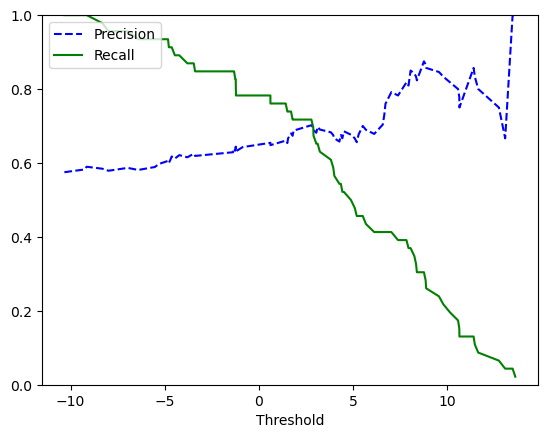

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier # Or any other classifier
from sklearn.model_selection import train_test_split
import numpy as np

# --- Assuming you have X_train and y_train defined ---
# For demonstration purposes, let's create some dummy data
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a classifier
# Here, we'll use an SGDClassifier, but replace with your actual model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# 2. Generate decision scores for the training set
# Use decision_function for models that provide it (like SGDClassifier, SVC)
# Or use predict_proba[:, 1] for models that provide probabilities (like LogisticRegression, RandomForestClassifier)
y_train_scores = sgd_clf.decision_function(X_train)

# Now, precision_recall_curve should work
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)
print(precisions, recalls, thresholds)

# Your plotting function (from your original code, if you have it)
def plot_precision_recall_curve(precisions, recalls, thresholds):
    import matplotlib.pyplot as plt
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

plot_precision_recall_curve(precisions, recalls, thresholds)